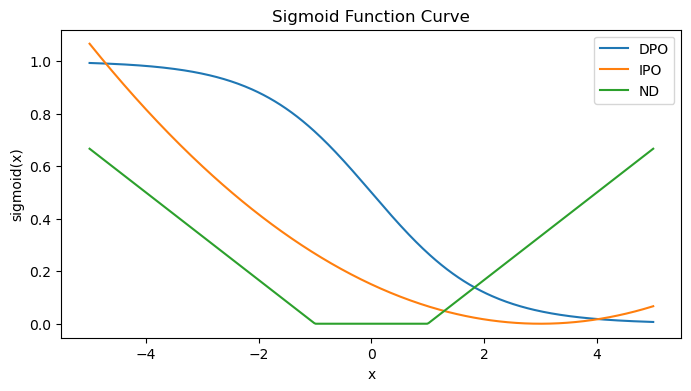

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(x):
    return -1 / (1 + np.exp(-x))+1

# Generate x values from -10 to 10
x = np.linspace(-5, 5, 400)
y = sigmoid(x)

y2 = (x-3)**2/60
y3 = np.maximum(np.abs(x)-1, 0)/6

# Plot the sigmoid function
plt.figure(figsize=(8, 4))
plt.plot(x, y, label='DPO')
plt.plot(x, y2, label='IPO')
plt.plot(x, y3, label='ND')
plt.title('Sigmoid Function Curve')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.grid(True)
plt.legend()
plt.grid(False)
plt.show()


In [18]:
y3

4.0

In [2]:
import torch
z = torch.tensor(12)

In [1]:
import torch
losses1 = torch.tensor([])

In [9]:
torch.tensor(0.0, requires_grad=True).grad

In [4]:
z.to(z.device)

tensor(12)

In [9]:
import torch

def pareto_dominant_volume(sample_points, reference_point):
    """
    Calculate the Pareto dominant volume of sample points with respect to a reference point.
    
    Args:
    - sample_points (torch.Tensor): Tensor of size N*2 containing N sample points.
    - reference_point (torch.Tensor): Tensor of size 2 containing the reference point.
    
    Returns:
    - float: Pareto dominant volume.
    """
    # Calculate the number of sample points
    num_points = sample_points.size(0)
    
    # Calculate the number of dimensions
    num_dimensions = sample_points.size(1)
    
    # Initialize a counter for dominated points
    dominated_count = 0
    
    # Iterate through each sample point
    for i in range(num_points):
        # Check if the sample point dominates the reference point
        if torch.all(sample_points[i] <= reference_point):
            # Increment the counter for dominated points
            dominated_count += 1
    
    # Calculate the ratio of dominated points to total points
    dominance_ratio = dominated_count / num_points
    
    # Calculate the Pareto dominant volume (area in 2D)
    pareto_volume = dominance_ratio * (reference_point[0] - sample_points[:, 0].min()) * (reference_point[1] - sample_points[:, 1].min())
    
    return pareto_volume

# Example usage:
sample_points = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
reference_point = torch.tensor([7.0, 8.0])

pareto_volume = pareto_dominant_volume(sample_points, reference_point)
print("Pareto dominant volume:", pareto_volume.item())


Pareto dominant volume: 36.0


In [13]:

import array
import random
import numpy as np

# Example Pareto front (list of solutions with two objectives)
pareto_front = [(1, 2), (2, 3), (3, 4), (4, 5), (5, 6)]

# Function to calculate hypervolume indicator
def hypervolume_indicator(pareto_front, ref_point):
    """
    Calculate hypervolume indicator for a Pareto front and reference point.
    
    :param pareto_front: List of Pareto optimal solutions.
    :param ref_point: Reference point for hypervolume calculation.
    :return: Hypervolume indicator value.
    """
    # Convert pareto front and reference point to numpy arrays
    pareto_front = np.array(pareto_front)
    ref_point = np.array(ref_point)
    
    # Sort Pareto front based on first objective (ascending order)
    pareto_front = pareto_front[np.argsort(pareto_front[:, 0])]
    print(pareto_front)
    # Initialize hypervolume
    hypervolume = 0.0
    
    # Iterate through solutions in Pareto front
    for i in range(len(pareto_front)):
        # Calculate hypervolume contribution of current solution
        if i == 0:
            hypervolume += (ref_point[0] - pareto_front[i][0]) * (ref_point[1] - pareto_front[i][1])
        else:
            hypervolume += (pareto_front[i-1][0] - pareto_front[i][0]) * (ref_point[1] - pareto_front[i][1])
    
    return hypervolume

# Reference point for hypervolume calculation (maximum values for each objective)
reference_point = (6, 7)

# Calculate hypervolume indicator
hv = hypervolume_indicator(pareto_front, reference_point)
print("Hypervolume Indicator:", hv)


[[1 2]
 [2 3]
 [3 4]
 [4 5]
 [5 6]]
Hypervolume Indicator: 15.0


In [10]:
sample_points = torch.tensor([[1.0, 2.0], [2.0, 1.0], [5.0, 6.0]])
reference_point = torch.tensor([7.0, 8.0])

pareto_volume = pareto_dominant_volume(sample_points, reference_point)
print("Pareto dominant volume:", pareto_volume.item())

Pareto dominant volume: 42.0


In [2]:
import torch

def pareto_dominance_volume(sample_points, reference_point):
    # Calculate the minimum and maximum x and y values
    min_x = torch.min(sample_points[:, 0])
    max_x = torch.max(sample_points[:, 0])
    min_y = torch.min(sample_points[:, 1])
    max_y = torch.max(sample_points[:, 1])
    
    # Calculate the area dominated by the sample points and also dominating the reference point
    dominate_volume = (max_x - min_x) * (max_y - min_y)
    
    # Check if the reference point is dominated by the sample points
    if (reference_point[0] >= min_x) and (reference_point[0] <= max_x) and (reference_point[1] >= min_y) and (reference_point[1] <= max_y):
        dominate_volume -= (reference_point[0] - min_x) * (reference_point[1] - min_y)
    
    return dominate_volume

In [3]:
pareto_dominant_volume(sample_points, reference_point)

tensor(36.)

In [5]:
import torch

def pareto_dominant_volume(sample_points, reference_point):
    """
    Calculate the Pareto dominant volume of sample points with respect to a reference point.
    
    Args:
    - sample_points (torch.Tensor): Tensor of size N*2 containing N sample points.
    - reference_point (torch.Tensor): Tensor of size 2 containing the reference point.
    
    Returns:
    - float: Pareto dominant volume.
    """
    # Calculate the number of sample points
    num_points = sample_points.size(0)
    
    # Calculate the number of dimensions
    num_dimensions = sample_points.size(1)
    
    # Initialize a counter for dominating points
    dominating_count = 0
    
    # Iterate through each sample point
    for i in range(num_points):
        # Check if the sample point is dominated by the reference point
        if torch.all(sample_points[i] <= reference_point):
            # Increment the counter for dominating points
            dominating_count += 1
    
    # Calculate the ratio of dominating points to total points
    dominance_ratio = dominating_count / num_points
    
    # Calculate the Pareto dominant volume (area in 2D)
    pareto_volume = dominance_ratio * (reference_point[0] - sample_points[:, 0].min()) * (reference_point[1] - sample_points[:, 1].min())
    
    return pareto_volume

# Example usage:
sample_points = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
reference_point = torch.tensor([7.0, 8.0])

pareto_volume = pareto_dominant_volume(sample_points, reference_point)
print("Pareto dominant volume:", pareto_volume.item())


Pareto dominant volume: 36.0


In [6]:
import torch

def pareto_dominate_volume(sample_points, reference_point):
  """
  Calculates the Pareto dominate volume of sample points with respect to a reference point.

  Args:
      sample_points: A torch tensor of size (N, 2) representing the sample points.
      reference_point: A torch tensor of size (2) representing the reference point.

  Returns:
      A float representing the Pareto dominate volume.
  """
  # Check for valid input shapes
  if sample_points.dim() != 2 or sample_points.shape[1] != 2:
    raise ValueError("sample_points must be a tensor of size (N, 2)")
  if reference_point.dim() != 1 or reference_point.shape[0] != 2:
    raise ValueError("reference_point must be a tensor of size (2)")

  # Calculate the number of dimensions (objectives)
  num_objectives = sample_points.shape[1]

  # Calculate boolean mask for points dominating the reference point in all dimensions
  dominates_reference = torch.all(sample_points < reference_point, dim=1)

  # Calculate boolean mask for points not dominated by any other sample point
  not_dominated = torch.ones(sample_points.shape[0], dtype=bool)
  for i in range(sample_points.shape[0]):
    current_point = sample_points[i]
    other_points = torch.cat((sample_points[:i], sample_points[i+1:]), dim=0)
    not_dominated[i] = torch.any(~torch.all(other_points <= current_point, dim=1))

  # Calculate the final mask for points in the Pareto dominate volume
  pareto_dominate = dominates_reference & not_dominated

  # Calculate the area (assuming minimization problems) by summing dominated objective differences
  dominate_volume = torch.sum(torch.where(pareto_dominate, reference_point - sample_points, torch.zeros_like(sample_points)))

  return dominate_volume.item()  # Return the scalar value


In [8]:
pareto_dominate_volume(sample_points, reference_point)

RuntimeError: The size of tensor a (3) must match the size of tensor b (2) at non-singleton dimension 1

In [14]:
import torch

def find_pareto_front(samples):
    """
    Find the Pareto front of given sample points.
    
    :param samples: Torch tensor of size N*2 containing sample points (N samples, 2 objectives).
    :return: List of indices of points in the Pareto front.
    """
    pareto_front = []
    dominated_by = torch.zeros(samples.size(0), dtype=torch.bool)
    
    for i, point1 in enumerate(samples):
        if not dominated_by[i]:
            pareto_front.append(i)
            for j, point2 in enumerate(samples):
                if i != j:
                    if torch.all(point1 <= point2):
                        dominated_by[j] = True
                    elif torch.all(point1 >= point2):
                        dominated_by[i] = True
                        pareto_front.remove(i)
                        break
                        
    return pareto_front

# Example sample points (torch tensor of size N*2)
samples = torch.tensor([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])

# Find Pareto front
pareto_front_indices = find_pareto_front(samples)

# Print Pareto front
pareto_front = samples[pareto_front_indices]
print("Pareto Front:")
print(pareto_front)

Pareto Front:
tensor([[1, 2]])


In [41]:
import torch

def find_pareto_front(samples):
    """
    Find the Pareto front of given sample points.
    
    :param samples: Torch tensor of size N*2 containing sample points (N samples, 2 objectives).
    :return: List of indices of points in the Pareto front.
    """
    pareto_front = []
    dominated_by = torch.zeros(samples.size(0), dtype=torch.bool)
    
    for i, point1 in enumerate(samples):
        if not dominated_by[i]:
            pareto_front.append(i)
            for j, point2 in enumerate(samples):
                if i != j:
                    if torch.all(point1 >= point2):
                        dominated_by[j] = True
                    elif torch.all(point1 <= point2):
                        dominated_by[i] = True
                        pareto_front.remove(i)
                        break
    PF = samples[pareto_front]
    return PF

def calculate_dominating_volume(pareto_front, ref_point):
    """
    Calculate the dominating volume of the Pareto front with respect to a reference point.
    
    :param pareto_front: Torch tensor of size N*2 containing points in the Pareto front (N points, 2 objectives).
    :param ref_point: Torch tensor of size 2 representing the reference point.
    :return: Dominating volume of the Pareto front.
    """
    # Sort Pareto front based on the first objective (ascending order)
    sorted_pareto_front = pareto_front[pareto_front[:, 0].argsort()]
    
    # Initialize dominating volume
    dominating_volume = 0.0
    
    # Initialize the right upper corner of the rectangle
    right_upper_corner = ref_point.clone()
    print(sorted_pareto_front)
    # Iterate through sorted Pareto front
    for point in sorted_pareto_front:
        # Calculate the width and height of the rectangle
        width = right_upper_corner[0] - point[0]
        height = right_upper_corner[1] - point[1]
        
        # Update dominating volume by adding the area of the rectangle
        dominating_volume += width * height
        
        # Update the right upper corner for the next rectangle
        right_upper_corner[0] = point[0]
        print(right_upper_corner)
    
    return dominating_volume

# Example sample points (torch tensor of size N*2)
samples = torch.tensor([[1, 2], [2, 1], [2, 1], [1.2, 1.7], [1.5, 1.5]])

# Find Pareto front
pareto_front_indices = find_pareto_front(samples)
# pareto_front = samples[pareto_front_indices]

# Reference point (torch tensor of size 2)
reference_point =torch.tensor([.0, .0])

# Calculate dominating volume
dominating_volume = calculate_dominating_volume(pareto_front, reference_point)

# Print dominating volume
print("Dominating Volume:", dominating_volume)


tensor([[1.0000, 2.0000],
        [1.2000, 1.7000],
        [1.5000, 1.5000],
        [2.0000, 1.0000]])
tensor([1., 0.])
tensor([1.2000, 0.0000])
tensor([1.5000, 0.0000])
tensor([2., 0.])
Dominating Volume: tensor(3.2900)


In [37]:
import torch

def find_pareto_front(samples):
    """
    Find the Pareto front of given sample points.
    
    :param samples: Torch tensor of size N*2 containing sample points (N samples, 2 objectives).
    :return: Pareto front as a torch tensor.
    """
    pareto_front = []
    dominated_by = torch.zeros(samples.size(0), dtype=torch.bool)
    
    for idx, point1 in enumerate(samples):
        if not dominated_by[idx]:
            pareto_front.append(idx)
            for j, point2 in enumerate(samples):
                if idx != j:
                    if torch.all(point1 <= point2):
                        dominated_by[j] = True
                    elif torch.all(point1 >= point2):
                        dominated_by[idx] = True
                        pareto_front.remove(idx)
                        break
    pareto_front_tensor = samples[pareto_front]
    return pareto_front_tensor

def calculate_dominating_volume(pareto_front, ref_point):
    """
    Calculate the dominating volume of the Pareto front with respect to a reference point.
    
    :param pareto_front: Torch tensor of size N*2 containing points in the Pareto front (N points, 2 objectives).
    :param ref_point: Torch tensor of size 2 representing the reference point.
    :return: Dominating volume of the Pareto front.
    """
    # Sort Pareto front based on the first objective (ascending order)
    sorted_pareto_front = pareto_front[pareto_front[:, 0].argsort()]
    
    # Initialize dominating volume
    dominating_volume = 0.0
    
    # Initialize the upper left corner of the rectangle
    upper_left_corner = ref_point.clone()
    
    # Iterate through sorted Pareto front
    for point in sorted_pareto_front:
        # Calculate the width and height of the rectangle
        width = upper_left_corner[0] - point[0]
        height = upper_left_corner[1] - point[1]
        
        # Update dominating volume by adding the area of the rectangle
        dominating_volume += width * height
        
        # Update the upper left corner for the next rectangle
        upper_left_corner[1] = point[1]
    
    return dominating_volume

# Example sample points (torch tensor of size N*2)
samples = torch.tensor([[1, 2], [2, 1], [3, 3], [1.2, 1.7], [1.5, 1.5]])

# Find Pareto front
pareto_front_tensor = find_pareto_front(samples)

# Reference point (torch tensor of size 2)
reference_point = torch.tensor([5.0, 5.0])

# Calculate dominating volume
dominating_volume = calculate_dominating_volume(pareto_front_tensor, reference_point)

# Print dominating volume
print("Dominating Volume:", dominating_volume)


Dominating Volume: tensor(15.3400)


In [20]:
pareto_front_indices = find_pareto_front(samples)
pareto_front = samples[pareto_front_indices]


In [26]:
pareto_front[pareto_front[:, 0].argsort()]

tensor([[1.0000, 2.0000],
        [1.2000, 1.7000],
        [1.5000, 1.5000],
        [2.0000, 1.0000]])